# Naive Bayes Algoritması ile Makine Öğrenmesi

Bu notebook, Naive Bayes algoritmasını açıklamakta ve bir örnek veri kümesi üzerinde uygulamaktadır.

## İçerik
1. Naive Bayes Algoritması Nedir?
2. Veri Seti Yükleme ve Keşifsel Veri Analizi
3. Naive Bayes Modeli ile Sınıflandırma
4. Model Performansının Değerlendirilmesi
5. Sonuç ve Yorumlar

## 1. Naive Bayes Algoritması Nedir?
Naive Bayes, olasılıksal bir sınıflandırma algoritmasıdır ve Bayes Teoremi'ne dayanır. "Naive" terimi, her özelliğin sınıftan bağımsız olduğunu varsaymasından gelir. Bu basitleştirilmiş varsayım genellikle doğru olmasa da, Naive Bayes birçok pratik uygulamada oldukça iyi performans gösterir.

## 2. Veri Seti Yükleme ve Keşifsel Veri Analizi
İlk olarak gerekli kütüphaneleri yükleyelim ve örnek bir veri seti üzerinde çalışalım.

In [1]:
# Gerekli kütüphaneleri yükleyelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Örnek veri seti olarak Iris veri setini kullanalım
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Veri setine göz atalım
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Naive Bayes Modeli ile Sınıflandırma
Veri setini eğitim ve test setlerine bölelim ve Naive Bayes modelini oluşturalım.

In [5]:
# Veri setini eğitim ve test setlerine bölelim
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes modelini oluşturalım ve eğitelim
model = GaussianNB()
model.fit(X_train, y_train)

# Test seti ile tahmin yapalım
y_pred = model.predict(X_test)

## 4. Model Performansının Değerlendirilmesi
Modelin performansını çeşitli metrikler kullanarak değerlendirelim.

Doğruluk Oranı: 0.98


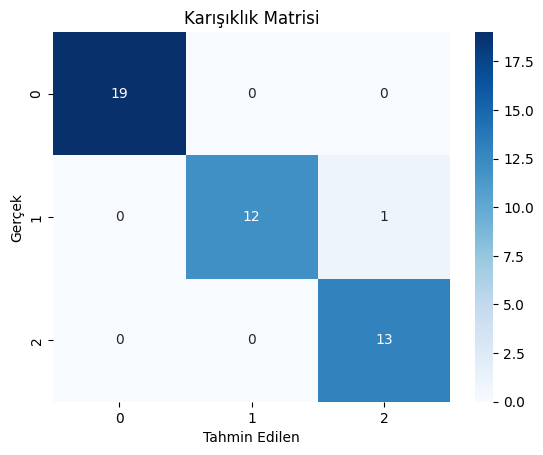

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        19\n  versicolor       1.00      0.92      0.96        13\n   virginica       0.93      1.00      0.96        13\n\n    accuracy                           0.98        45\n   macro avg       0.98      0.97      0.97        45\nweighted avg       0.98      0.98      0.98        45\n'

In [6]:
# Doğruluk oranı
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporu
report = classification_report(y_test, y_pred, target_names=iris.target_names)
report

## 5. Sonuç ve Yorumlar
Bu notebook'ta, Naive Bayes algoritmasını kullanarak Iris veri seti üzerinde bir sınıflandırma modeli oluşturduk. Modelin doğruluk oranı, karışıklık matrisi ve sınıflandırma raporu ile performansını değerlendirdik. Naive Bayes algoritması, basit ve hızlı bir yöntem olmasına rağmen birçok problemde iyi sonuçlar verebilmektedir.